# Keras Basics

In [38]:
# You can safely ignore any warnings on importing this
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [39]:
m = 2
b = 3
# Linearly spaced values
x = np.linspace(0,50,100)

# 101 is an arbitrary choice
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [40]:
y = 2*x + b + noise

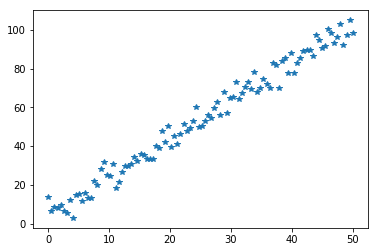

In [41]:
plt.plot(x,y,'*') # This prevents connecting datapoints

## Creating a Neural Network for a Line of Best Fit

In [42]:
# Sequential allows a bunch of layers to add in sequence
from keras.models import Sequential

# Dense connects neurons 4m previous layer to next layer
from keras.layers import Dense

In [43]:
model = Sequential()

# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))

# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))

# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))

# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [45]:
model.fit(x, y, batch_size = 1, epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 3214.5422
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 2720.0415
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 2064.5929
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 1331.1154
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 686.0545
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 264.3669
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 80.0028
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 28.2977
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 18.8943
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 17.7638
Epoch 11/100
100/100 [==============================] - 0s 1ms/step - loss: 17.7418
Epoch 12/100
100/100 [==============================] - 0s 1ms/step - loss:

100/100 [==============================] - 0s 1ms/step - loss: 17.2447
Epoch 99/100
100/100 [==============================] - 0s 1ms/step - loss: 17.0029
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 17.2843


In [46]:
# To get the loss values and plot it vs epochs
model.history.history['loss'][:5]

[3214.5422355127334,
 2720.0415050464867,
 2064.592856259048,
 1331.1153879451751,
 686.054477544874]

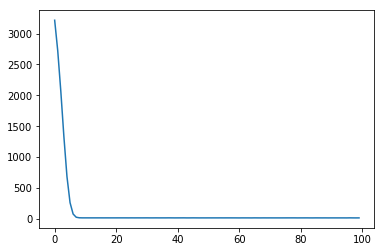

In [47]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss)

In [48]:
# Seems like 20 epochs would be good

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [52]:
# Predict on one point, otherwise throwing error
#x = np.linspace(0,50,100)
x_for_predictions = np.linspace(0,50,1)#100

In [53]:
y_predicted = model.predict(x_for_predictions)

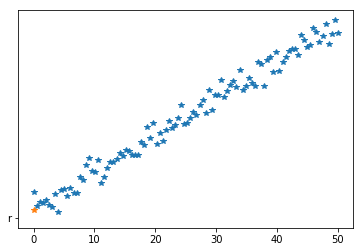

In [54]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'*','r')

# Evaluating Our Error

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [56]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [57]:
mean_squared_error(y,prediction_for_true_y)

17.201005558625116

In [58]:
mean_absolute_error(y,prediction_for_true_y)

3.3058001742448515